In [42]:
import pandas as pd


In [43]:
file_path = '/Users/chojungseok/Desktop/code/DAMF2/ML/data/Fish.csv'
df = pd.read_csv(file_path)

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [44]:
## 도미(Perch) 데이터만 추출
cond = df['Species'] == 'Perch'

perch_data = df.loc[cond]
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


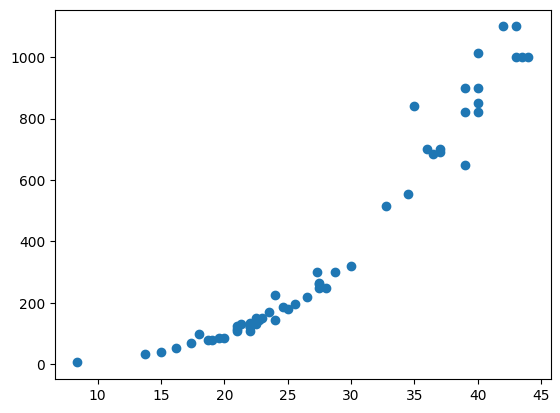

In [45]:
import matplotlib.pyplot as plt

plt.scatter(perch_data['Length2'], perch_data['Weight'])

In [46]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_data[['Length2']], perch_data[['Weight']])

In [47]:
train_input.head()

,Length2
99,25.0
108,30.0
87,22.0
90,22.0
76,17.4


In [48]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [49]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [50]:
knr.score(test_input, test_target)

0.9723897601779969

In [51]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
print(test_prediction, test_input)

[[ 689.2]
 [ 898. ]
 [ 258.6]
 [ 898. ]
 [1004. ]
 [ 166.6]
 [ 132. ]
 [ 738. ]
 [  66.3]
 [ 742. ]
 [  66.3]
 [ 279. ]
 [ 898. ]
 [ 119. ]]      Length2
112     36.5
119     40.0
105     27.5
120     40.0
124     43.0
96      24.0
93      22.7
116     39.0
72       8.4
115     37.0
74      15.0
107     28.7
121     40.0
83      21.0


In [52]:
mae = mean_absolute_error(test_target, test_prediction)
mae

41.49285714285715

In [53]:
knr.score(train_input, train_target)

0.9778185064832965

학습 할때 점수와 채점할때의 점수가 너무 많이 나게 되면 과대적합 또는 과소적합이라고 한다

In [55]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9800140773164487
0.9357332220014591


/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


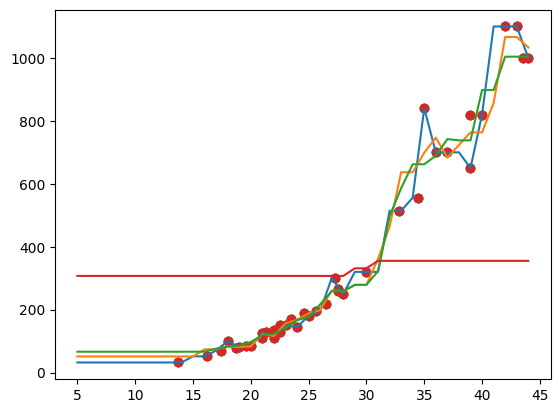

In [57]:
# neighbor의 최적의 갯수

import numpy as np

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1,1)

for i in [1,3,5,40]:
    knr.n_neighbors = i
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    plt.scatter(train_input,train_target)
    plt.plot(x, prediction)